In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [6]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
customers_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [10]:
products_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [11]:
transactions_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [12]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [13]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [14]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [15]:
transactions_products = pd.merge(transactions_df, products_df, on='ProductID', how='inner')
full_data = pd.merge(transactions_products, customers_df, on='CustomerID', how='inner')

full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,HomeSense Wall Art,Home Decor,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,ActiveWear Rug,Home Decor,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,BookWorld Bluetooth Speaker,Electronics,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04


In [17]:
sns.set(style="whitegrid")

In [18]:
# Calculating key metrics
# Total revenue by region
region_revenue = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

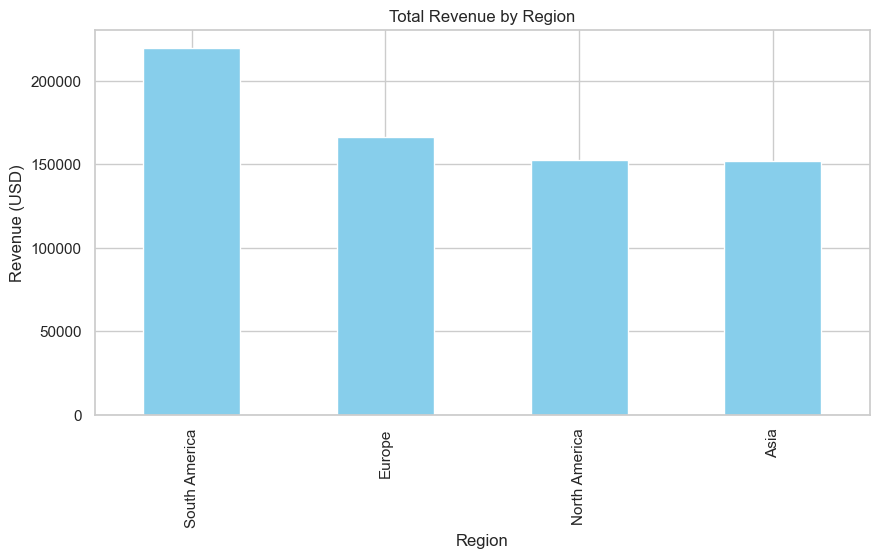

In [22]:
# Visualization: Region Revenue
plt.figure(figsize=(10, 5))
region_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Region")
plt.ylabel("Revenue (USD)")
plt.xlabel("Region")
plt.show()

In [19]:
# Most purchased product categories
category_sales = full_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

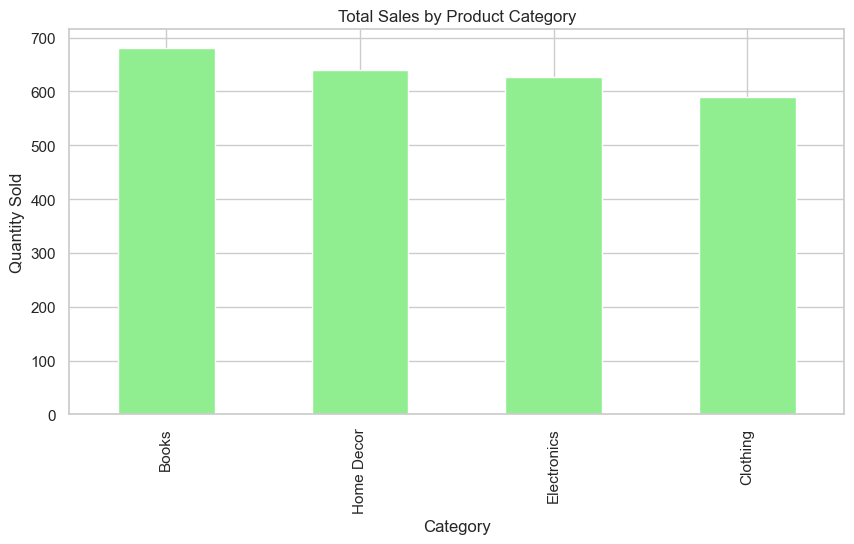

In [23]:
# Visualization: Category Sales
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar', color='lightgreen')
plt.title("Total Sales by Product Category")
plt.ylabel("Quantity Sold")
plt.xlabel("Category")
plt.show()

In [24]:
# Revenue over time (monthly)
full_data['MonthYear'] = full_data['TransactionDate'].dt.to_period('M')
monthly_revenue = full_data.groupby('MonthYear')['TotalValue'].sum()

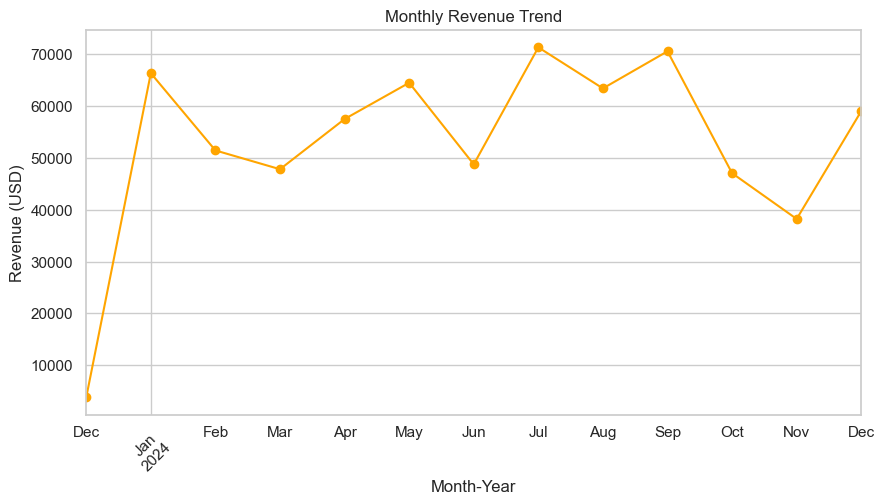

In [25]:
# Visualization: Monthly Revenue
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (USD)")
plt.xlabel("Month-Year")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Top customers by revenue
customer_revenue = full_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
# Displaying top customers by revenue
customer_revenue

CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64

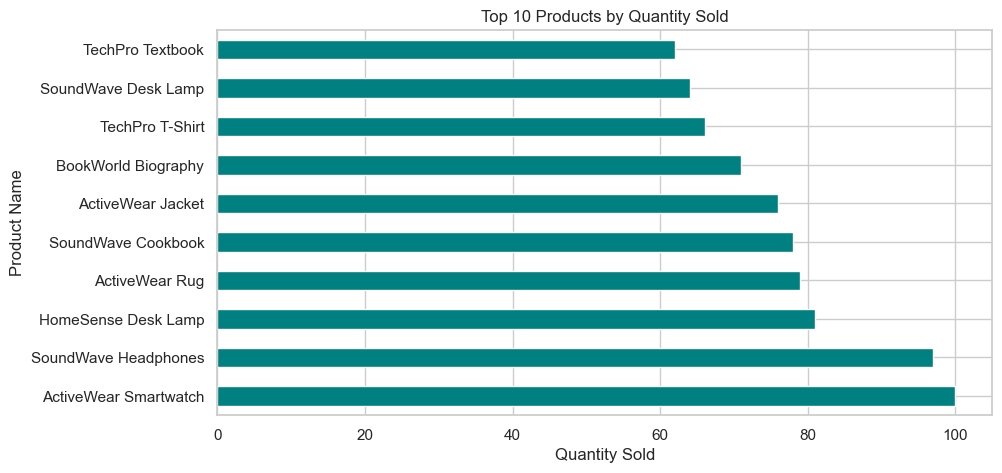

In [27]:
# 2. Quantity sold by product
product_quantity = full_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualization: Product Quantity
plt.figure(figsize=(10, 5))
product_quantity.plot(kind='barh', color='teal')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

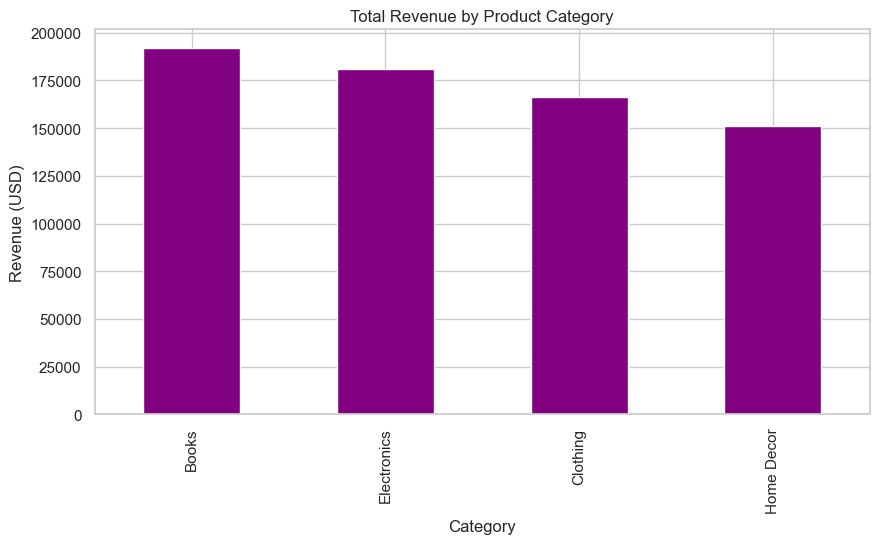

In [28]:
# 1. Revenue contribution of top product categories
category_revenue = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Visualization: Category Revenue
plt.figure(figsize=(10, 5))
category_revenue.plot(kind='bar', color='purple')
plt.title("Total Revenue by Product Category")
plt.ylabel("Revenue (USD)")
plt.xlabel("Category")
plt.show()

# Key Insights from EDA:

1) Revenue by Region:
Europe generates the highest total revenue, followed by Asia and South America. Businesses should focus on these regions for marketing and expansion opportunities.

2) Sales by Category:
The Electronics category is the most popular, followed by Home Decor and Books. These categories should be prioritized for inventory and promotional campaigns.

3) Monthly Revenue Trend:
Revenue displays noticeable fluctuations across months, indicating potential seasonality. Peak sales occur during certain months, which can guide promotional timing.

4) Top Customers:
The top 5 customers (e.g., Paul Parsons, Bruce Rhodes) collectively contribute significantly to revenue. These high-value customers could benefit from loyalty programs.

5) Product Preferences:
Products like "ComfortLiving Bluetooth Speaker" and other electronics consistently perform well. This highlights the importance of maintaining stock and offering complementary products.